In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
%matplotlib inline
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [4]:
# load fashion mnist dataset
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
print('Training dataset shape : ', train_X.shape, train_Y.shape)
print('Testing dataset shape : ', test_X.shape, test_Y.shape)

classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

4423680/4422102 [==============================] - 13s 3us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 9')

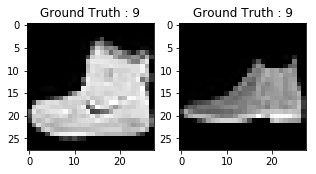

In [5]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [6]:
# reshape training data
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# type conversion
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [8]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [9]:
# split data into train and validation
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
batch_size = 64
epochs = 20
num_classes = 10

In [12]:
## CNN Model Structure with 3 layers

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(28,28,1)))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))         
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))     
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [13]:
## CNN Model Summary
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [14]:
# compile cnn model
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [15]:
# fit the model with training dataset
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 404s 8ms/step - loss: 0.6436 - acc: 0.7581 - val_loss: 0.3828 - val_acc: 0.8600
Epoch 2/20
48000/48000 [==============================] - 439s 9ms/step - loss: 0.4079 - acc: 0.8511 - val_loss: 0.3378 - val_acc: 0.8762
Epoch 3/20
48000/48000 [==============================] - 561s 12ms/step - loss: 0.3523 - acc: 0.8695 - val_loss: 0.2901 - val_acc: 0.8909
Epoch 4/20
48000/48000 [==============================] - 418s 9ms/step - loss: 0.3224 - acc: 0.8801 - val_loss: 0.2738 - val_acc: 0.8988
Epoch 5/20
48000/48000 [==============================] - 424s 9ms/step - loss: 0.3028 - acc: 0.8888 - val_loss: 0.2558 - val_acc: 0.9065
Epoch 6/20
48000/48000 [==============================] - 420s 9ms/step - loss: 0.2841 - acc: 0.8937 - val_loss: 0.2481 - val_acc: 0.9093
Epoch 7/20
48000/48000 [==============================] - 427s 9ms/step - loss: 0.2719 - acc: 0.8984 - val_loss: 0.2352 -

In [16]:
# save the tramed model
fashion_model.save("fashion_trained_model.h5py")

In [17]:
# Evaluate test dataset on the model
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 25s 3ms/step


In [18]:
# testing loss and testing accuracy
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.217694911516
Test accuracy: 0.9215


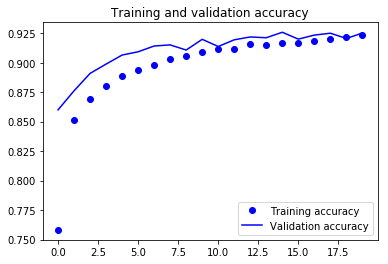

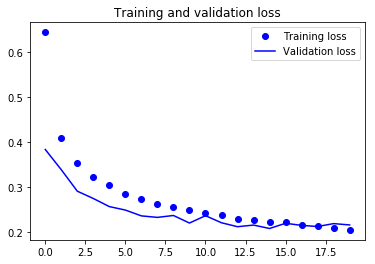

In [19]:
# Plot graph b/w accuracy and loss on training and validation dataset

accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
# predict test classes with probabilities
predicted_classes = fashion_model.predict(test_X)

In [21]:
# find target classes
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9149 correct labels


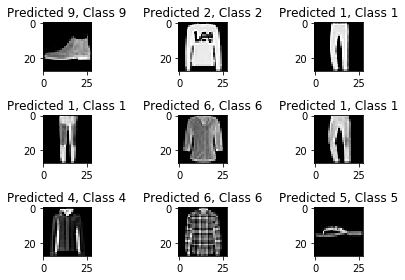

In [23]:
# plot some currect test images with prediction
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 851 incorrect labels


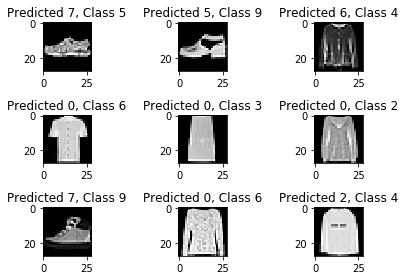

In [25]:
# show incurrect prediction images
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [26]:
# show the precision, recall and f1-score for all classes
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.74      0.91      0.82      1000
    Class 1       1.00      0.98      0.99      1000
    Class 2       0.86      0.90      0.88      1000
    Class 3       0.92      0.93      0.93      1000
    Class 4       0.89      0.85      0.87      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.85      0.67      0.75      1000
    Class 7       0.95      0.99      0.97      1000
    Class 8       0.99      0.98      0.99      1000
    Class 9       0.99      0.96      0.97      1000

avg / total       0.92      0.91      0.91     10000

